# How Long Does a Car Stay on the Market



In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('Resources/cleaned_df.csv')
df

,dateCrawled,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:00
1,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:00
2,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:00
3,2016-04-04 17:36:00,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,3er,150000,benzin,bmw,2016-04-06 19:17:00
4,2016-04-01 20:48:00,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:00
...,...,...,...,...,...,...,...,...,...,...
307116,2016-03-27 20:36:00,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,zafira,150000,benzin,opel,2016-03-29 10:17:00
307117,2016-03-05 19:56:00,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,fortwo,125000,benzin,smart,2016-03-11 18:17:00
307118,2016-03-19 18:57:00,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,transporter,150000,diesel,volkswagen,2016-04-07 07:15:00
307119,2016-03-20 19:41:00,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,golf,150000,diesel,volkswagen,2016-03-24 12:45:00


In [3]:
# Renaming dateCrawled to offeringDate
df.rename(columns={'dateCrawled': 'offeringDate'}, inplace=True)
# Listing out the columns
df.columns

Index(['offeringDate', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'model', 'kilometer', 'fuelType', 'brand', 'lastSeen'],
      dtype='object')

In [4]:
df['vehicleType'] = df['vehicleType'].replace({'andere' : 'other','kombi' : 'station wagon','kleinwagen': 'sedan',
                                               'cabrio': 'convertable','limousine': 'luxury'})
df.vehicleType.unique()


array(['suv', 'sedan', 'luxury', 'convertable', 'bus', 'station wagon',
       'coupe', 'other'], dtype=object)

In [5]:
# Check the data types of the columns
df.dtypes

offeringDate          object
name                  object
price                  int64
vehicleType           object
yearOfRegistration     int64
model                 object
kilometer              int64
fuelType              object
brand                 object
lastSeen              object
dtype: object

In [6]:
# Convert offeringDate and lastSeen in datetime
df['offeringDate'] = pd.to_datetime(df['offeringDate'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307121 entries, 0 to 307120
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   offeringDate        307121 non-null  datetime64[ns]
 1   name                307121 non-null  object        
 2   price               307121 non-null  int64         
 3   vehicleType         307121 non-null  object        
 4   yearOfRegistration  307121 non-null  int64         
 5   model               307121 non-null  object        
 6   kilometer           307121 non-null  int64         
 7   fuelType            307121 non-null  object        
 8   brand               307121 non-null  object        
 9   lastSeen            307121 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 23.4+ MB


In [7]:
# Create new column to hold time spent in market
df['marketDuration'] = df['lastSeen'] - df['offeringDate']
df

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen,marketDuration
0,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:00,21 days 23:55:00
1,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,sedan,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:00,0 days 00:46:00
2,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,sedan,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:00,5 days 16:52:00
3,2016-04-04 17:36:00,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,luxury,1995,3er,150000,benzin,bmw,2016-04-06 19:17:00,2 days 01:41:00
4,2016-04-01 20:48:00,Peugeot_206_CC_110_Platinum,2200,convertable,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:00,3 days 21:30:00
...,...,...,...,...,...,...,...,...,...,...,...
307116,2016-03-27 20:36:00,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,zafira,150000,benzin,opel,2016-03-29 10:17:00,1 days 13:41:00
307117,2016-03-05 19:56:00,Smart_smart_leistungssteigerung_100ps,1199,convertable,2000,fortwo,125000,benzin,smart,2016-03-11 18:17:00,5 days 22:21:00
307118,2016-03-19 18:57:00,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,transporter,150000,diesel,volkswagen,2016-04-07 07:15:00,18 days 12:18:00
307119,2016-03-20 19:41:00,VW_Golf_Kombi_1_9l_TDI,3400,station wagon,2002,golf,150000,diesel,volkswagen,2016-03-24 12:45:00,3 days 17:04:00


In [8]:
mkt_Duration_By_Type_mean = df.groupby(['vehicleType'])['marketDuration'].mean()
mkt_Duration_By_Type_mean.sort_values()

vehicleType
sedan           8 days 06:28:04.566285454
station wagon   8 days 14:24:23.819610850
bus             8 days 14:41:01.564131508
other           8 days 17:44:03.879802206
luxury          8 days 18:18:42.269132839
suv             9 days 13:08:11.958212936
convertable     9 days 16:54:13.425697475
coupe           9 days 17:26:00.006994229
Name: marketDuration, dtype: timedelta64[ns]

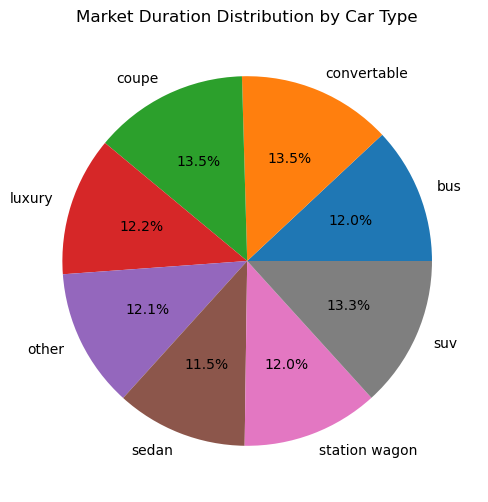

In [9]:
# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(mkt_Duration_By_Type_mean, labels=mkt_Duration_By_Type_mean.index, autopct='%1.1f%%')
plt.title('Market Duration Distribution by Car Type')

plt.show()